In [2]:
import pandas as pd
import numpy as np
import os

os.chdir("..")
PATH = os.getcwd()
print(PATH)
PATH = PATH + '/data/'
print(PATH)

/home/sashank/Documents/SmartGrid
/home/sashank/Documents/SmartGrid/data/


In [3]:
df = pd.read_excel(PATH+'generatoroutput.xlsx')

In [4]:
df.head()

,Document,docID,xmlns,xmlns:xsi,xsi:schemaLocation,DocHeader,DocTitle,DocRevision,DocConfidentiality,DocConfClass,...,DeliveryYear,DailyData,Day,HourlyData,Hour,FuelTotal,Fuel,EnergyValue,OutputQuality,Output
0,NaN,GenOutputbyFuelHourly,http://www.ieso.ca/schema,http://www.w3.org/2001/XMLSchema-instance,http://www.ieso.ca/schema http://reports.ieso....,NaN,Generator Output by Fuel Type Hourly Report,1.0,NaN,PUB,...,2018.0,NaN,2018-01-01,NaN,1.0,NaN,NUCLEAR,NaN,0,11671
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GAS,NaN,0,1583
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,HYDRO,NaN,0,4152
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WIND,NaN,0,992
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOLAR,NaN,0,0


In [5]:
df1 = df[['Fuel','Output']]

In [6]:
df1.head()

,Fuel,Output
0,NUCLEAR,11671
1,GAS,1583
2,HYDRO,4152
3,WIND,992
4,SOLAR,0


In [7]:
s = df.groupby('Fuel')['Output'].apply(list)
s.apply(pd.Series).T

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND
0,3,1583,4152,11671,0,992
1,1,1192,4093,11672,0,1124
2,0,1040,4231,11672,0,1265
3,0,1041,3895,11669,0,1369
4,0,1004,3271,11674,0,1848
5,0,1048,3292,11682,0,2022
6,1,966,3977,11682,0,2378
7,4,741,4311,11682,0,2542
8,2,650,4058,11678,2,2719
9,2,556,4644,11682,13,2687


In [8]:
df2 = s.apply(pd.Series).T.copy()

In [9]:
df2.head()

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND
0,3,1583,4152,11671,0,992
1,1,1192,4093,11672,0,1124
2,0,1040,4231,11672,0,1265
3,0,1041,3895,11669,0,1369
4,0,1004,3271,11674,0,1848


In [10]:
df2['TotalOutput'] = df2[['BIOFUEL','GAS','HYDRO','NUCLEAR','SOLAR','WIND']].sum(axis=1)

In [11]:
df2.head()

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput
0,3,1583,4152,11671,0,992,18401
1,1,1192,4093,11672,0,1124,18082
2,0,1040,4231,11672,0,1265,18208
3,0,1041,3895,11669,0,1369,17974
4,0,1004,3271,11674,0,1848,17797


In [12]:
df3 = pd.read_csv(PATH+'PUB_Demand_2018.csv',skiprows=3)

In [13]:
df3.head()

,Date,Hour,Market Demand,Ontario Demand
0,2018-01-01,1,18974,16627
1,2018-01-01,2,18447,16084
2,2018-01-01,3,18453,15866
3,2018-01-01,4,18662,15725
4,2018-01-01,5,18060,15470


In [14]:
df4 = pd.read_csv(PATH+'PUB_PriceHOEPPredispOR_2018.csv',skiprows=3)

In [15]:
df4.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
1,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
2,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
3,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
4,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


In [16]:
df4.shape

(8760, 9)

In [17]:
df3.shape

(8760, 4)

In [18]:
df2.shape

(8760, 7)

In [19]:
df4.drop(columns=['Date','Hour','Hour 1 Predispatch','Hour 2 Predispatch','Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min'], inplace=True)

In [20]:
df4.head()

,HOEP
0,51.29
1,43.59
2,93.60
3,54.78
4,14.35


In [21]:
df3.set_index('Date').head()

,Hour,Market Demand,Ontario Demand
Date,,,
2018-01-01,1,18974,16627
2018-01-01,2,18447,16084
2018-01-01,3,18453,15866
2018-01-01,4,18662,15725
2018-01-01,5,18060,15470


In [22]:
result = pd.concat([df3,df4,df2],axis=1)

In [23]:
result.head()

,Date,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput
0,2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401
1,2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082
2,2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208
3,2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974
4,2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797


In [24]:
min_HOEP = result['HOEP'].min()

In [25]:
min_HOEP

-4.39

In [26]:
max_HOEP = result['HOEP'].max()

In [27]:
max_HOEP

365.64

In [28]:
import random
def rand_(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res

cpny_price = rand_(round(min_HOEP),round(max_HOEP),8760)

In [29]:
len(cpny_price)

8760

In [30]:
df5 = pd.DataFrame({'Company_HOEP': cpny_price})

In [31]:
df5.shape

(8760, 1)

In [32]:
result = pd.concat([result,df5], axis=1)

In [33]:
result.head()

,Date,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput,Company_HOEP
0,2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401,338
1,2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082,310
2,2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208,4
3,2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974,44
4,2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797,348


In [34]:
result.set_index('Date')

,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput,Company_HOEP
Date,,,,,,,,,,,,
2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401,338
2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082,310
2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208,4
2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974,44
2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797,348
2018-01-01,6,18429,15502,18.60,0,1048,3292,11682,0,2022,18044,243
2018-01-01,7,19137,15750,21.72,1,966,3977,11682,0,2378,19004,263
2018-01-01,8,19470,15887,40.89,4,741,4311,11682,0,2542,19280,108
2018-01-01,9,19333,15923,20.75,2,650,4058,11678,2,2719,19109,66


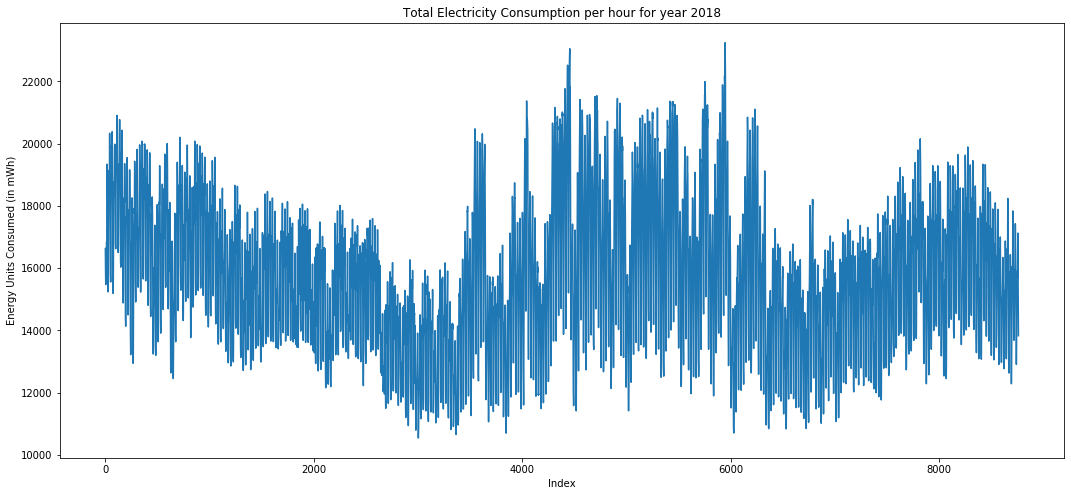

In [65]:
# Plotting data
import matplotlib.pyplot as plt

x = result.index
y = result['Ontario Demand']

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(x,y)

plt.title('Total Electricity Consumption per hour for year 2018')
plt.xlabel('Index')
plt.ylabel('Energy Units Consumed (in mWh)')
plt.savefig('Demand_plot.png')
plt.show()

<Figure size 1440x640 with 0 Axes>

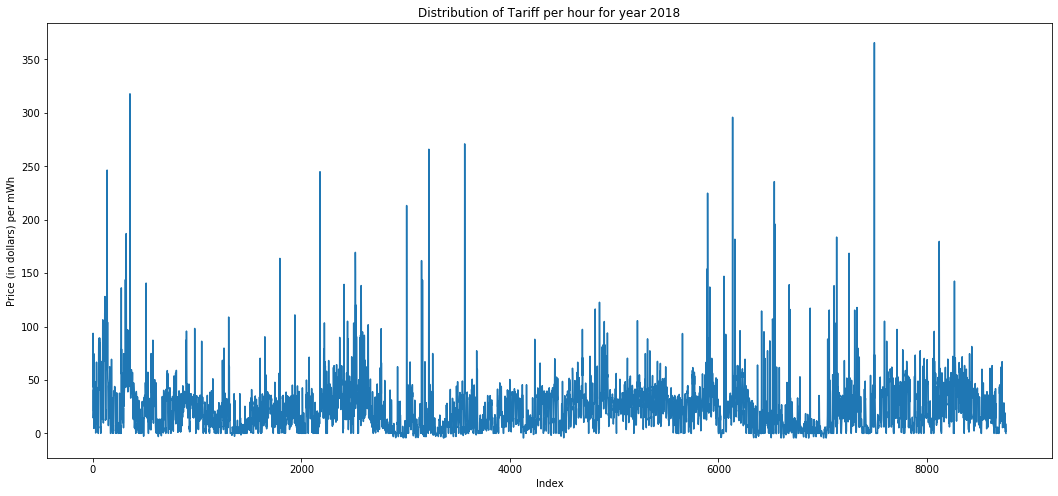

In [64]:
# Plotting data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')

x = result.index
y = result['HOEP']

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(x,y)

plt.title('Distribution of Tariff per hour for year 2018')
plt.xlabel('Index')
plt.ylabel('Price (in dollars) per mWh')
plt.savefig('HOEP_plot.png')
plt.show()

In [70]:
result.to_excel(PATH+'final_data.xlsx')